# K-Nearest Neighbors Classifier for diagnosis of COVID-19

## Goal for this Notebook

This notebook aims to develop a model that would predict confirmed **COVID-19 cases** among suspected cases. This model would be trained using the provided data set containing the results of laboratory tests, using the **K Nearest Neighbors Algorithm** and the optimized parameters.

#### Data Handling

- Importing Data with Pandas
- Cleaning Data
- Exploring Data through Visualizations with Matplotlib

#### Supervised Machine Learning Technique
- K Nearest Neighbors Classification 
    
#### Hyperparameter Tuning
- Grid Search Cross Validation
    
#### Model Performance
- Score 
- Classification Report
- Confusion Matrix

#### Required Packages
- NumPy
- Pandas
- Scikit Learn
- Matplotlib
- Seaborn

#### Dataset
This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.
<br />
Reference : *einsteindata4u/covid19?*

To begin with, let's make all the necessary imports to start working.

In [1]:
# for performing mathematical operations
import numpy as np 

# for data processing, CSV file I/O 
import pandas as pd 

# for plotting and visualozing data
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Preparation

In this section, required dataset is imported, explored and cleaned to make it available in the right format for the implementation of K Nearest Neighbors Classification. 

Data Analysis techniques used in this section includes: 
- Importing data set using Pandas 
- Exploring data to find features and target 
- Handling missing or corrupted values in the data
- Visualizing data using Matplotlib to explore relationships

*You can skip this section if you want to play with data yourself.*
 

### Dataset Details

We will be using the CSV format file called **COVID-19_Dataset** to train our model. The CSV file contains rows (observations) describing various parameters and factors defined with the help of columns (features). The dataset contains more than 5K  observations. 

### Importing Data using Pandas Library

In [2]:
# read the data from the excel file into a dataframe
dataset = pd.read_excel('SARS-COV-2.xlsx', index_col=0)

### Exploration of Data
We have loaded our required dataset, now we will see it's first five rows to check how our data looks.

In [3]:
# checking first thirty rows of our dataset
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
dataset.head(30)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
# checking the shape of my dataset
dataset.shape

(5644, 110)

We have **110** columns and **5644** rows in our dataset.

In [5]:
# extracting information from the dataset for the predictor and target variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 44477f75e8169d2 to 2697fdccbfeb7f7
Columns: 110 entries, Patient age quantile to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(36)
memory usage: 4.8+ MB


### Investigating Data for Predictors and Target
In the dataset provided, we have extracted the information regarding the columns and rows. Rows are refered as *observations*. Each column in this data set tells us something about each of our observations, like Hematocrit, Hemoglobin, or Platelets. These columns are called *Features* or *Predictor Variables* of our dataset. Column "SARS-Cov-2 exam result" classifies our dataset and predicts whether or not a person is a COVID-19 patient, and is considered as *Target Variable*. 

**Target** 
- SARS-Cov-2 exam result

Also, we have been provided with **5644 observations**, ranged from 0 to 5643. 

In [6]:
# Understanding the fields of the dataset on the basis of statistical variables
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient age quantile,5644,NaN,NaN,NaN,9.31839,5.7779,0,4,9,14,19
SARS-Cov-2 exam result,5644,2,negative,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to regular ward (1=yes, 0=no)",5644,NaN,NaN,NaN,0.0139972,0.117489,0,0,0,0,1
"Patient addmited to semi-intensive unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00885897,0.0937125,0,0,0,0,1
"Patient addmited to intensive care unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00726435,0.0849286,0,0,0,0,1
Hematocrit,603,NaN,NaN,NaN,-2.18621e-09,1.00083,-4.50142,-0.518807,0.053407,0.717175,2.6627
Hemoglobin,603,NaN,NaN,NaN,-1.60132e-08,1.00083,-4.3456,-0.586244,0.040316,0.729532,2.67187
Platelets,602,NaN,NaN,NaN,-3.535e-10,1.00083,-2.55243,-0.605346,-0.121716,0.531498,9.53203
Mean platelet volume,599,NaN,NaN,NaN,7.43814e-09,1.00084,-2.45757,-0.662483,-0.101517,0.683835,3.71305
Red blood Cells,602,NaN,NaN,NaN,8.42445e-09,1.00083,-3.97061,-0.56795,0.0138521,0.666176,3.64571


In [7]:
# finding out the number of positive and negative SARS-Cov-2 Cases
print("\nNumber of Positive and Negative Cases of SARS-COV-2")
dataset['SARS-Cov-2 exam result'].value_counts()


Number of Positive and Negative Cases of SARS-COV-2


negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

By this we know that, we have **5086** Negative yet, **558** Postive cases.

### Cleaning Data - Dropping Unnecessary Columns

The data have 3 columns: 
- Patient addmited to regular ward (1=yes, 0=no)"
- Patient addmited to semi-intensive unit (1=yes, 0=no)
- Patient addmited to intensive care unit (1=yes, 0=no)

The values of these columns would contribute nothing to our analysis. To handle this, we will drop the values of these columns from the dataset.

In [8]:
# dropping the selected columns 
dataset.drop(columns=['Patient addmited to regular ward (1=yes, 0=no)',
                      'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                      'Patient addmited to intensive care unit (1=yes, 0=no)'], inplace=True)

Fortunately, we have dropped the values of the selected unncessary columns from our dataset.

### Dealing with the Case of Missing Values
The dataset with which we are about to train our model has many missing values due to unaccountable reasons. There are many ways which are used to deal with such missing values. Let's investigate them.

In [9]:
# looking for null values
total_null_values = dataset.isnull().sum().sort_values(ascending=False) 
not_null_values = dataset.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (dataset.isnull().sum()/dataset.notnull().count().sort_values(ascending=False)) * 100

# concating the calculated values with the data frame of null values
dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Percentage': null_values_percentage}, axis=1)

# view the newly formed dataframe
dataset_missing_values

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.000000
Urine - Sugar,5644,0,100.000000
Partial thromboplastin time (PTT),5644,0,100.000000
"Prothrombin time (PT), Activity",5644,0,100.000000
D-Dimer,5644,0,100.000000
Fio2 (venous blood gas analysis),5643,1,99.982282
Urine - Nitrite,5643,1,99.982282
Vitamin B12,5641,3,99.946846
Lipase dosage,5636,8,99.858257
Albumin,5631,13,99.769667


Text(0.5, 1.0, 'Missing Data in our Dataset')

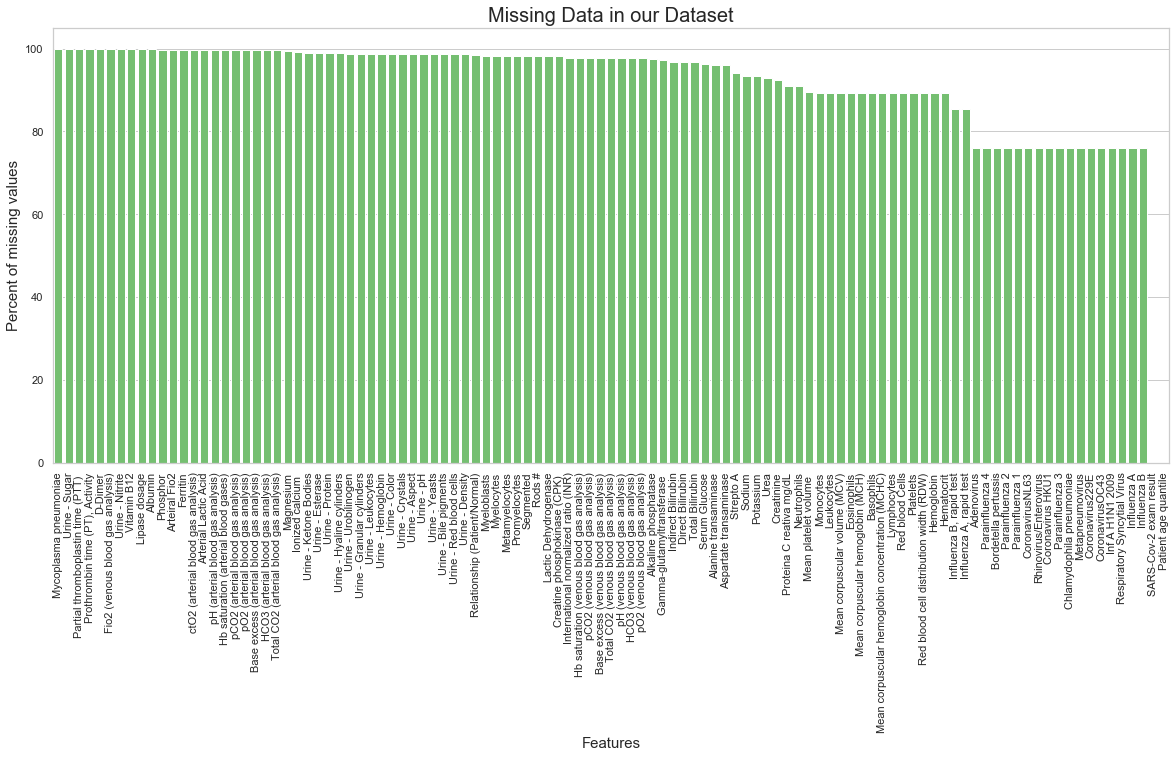

In [10]:
sns.set(style="whitegrid")

# initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(20,8))

# plot the Total Missing Values
sns.set_color_codes("muted")
sns.barplot(x=dataset_missing_values.index, y="Percentage", data=dataset_missing_values, color="g")

# customizing Bar Graph
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Missing Data in our Dataset', fontsize=20)

In [11]:
# finding those columns that completely doesn't have any values
dataset_missing_values[dataset_missing_values['Percentage']==100]

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.0
Urine - Sugar,5644,0,100.0
Partial thromboplastin time (PTT),5644,0,100.0
"Prothrombin time (PT), Activity",5644,0,100.0
D-Dimer,5644,0,100.0


In [58]:
# finding those columns that doesn't have any values more than 5 values
dataset_missing_values[dataset_missing_values['Not Null'] <= 6]

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.000000
Urine - Sugar,5644,0,100.000000
Partial thromboplastin time (PTT),5644,0,100.000000
"Prothrombin time (PT), Activity",5644,0,100.000000
D-Dimer,5644,0,100.000000
Fio2 (venous blood gas analysis),5643,1,99.982282
Urine - Nitrite,5643,1,99.982282
Vitamin B12,5641,3,99.946846


What can be percieved from this is, we have **5** columns with 100% null values. Also, we have **3** more columns that contains only 1 or upto 6 values. There is not much that they contribute to our analysis, so let's eliminate them.

In [13]:
# dropping the selected columns 
dataset.drop(columns=['Mycoplasma pneumoniae','Urine - Sugar','Prothrombin time (PT), Activity','D-Dimer','Fio2 (venous blood gas analysis)','Urine - Nitrite','Vitamin B12'], inplace=True)

#### Let's replace all our 'NaN' values with 0.

In [14]:
# replace NaNs by 0
dataset = dataset.fillna(0)

#### Let's replace all our affirmative/positive values to 1 and all negative values to 0

In [15]:
dataset.replace('not_detected', 0, inplace=True)
dataset.replace('detected', 0, inplace=True)
dataset.replace('absent', 0, inplace=True)
dataset.replace('present', 1, inplace=True)
dataset.replace('negative', 0, inplace=True)
dataset.replace('positive', 1, inplace=True)

Now, this dataset is in the most right format for our targeted algorithm. Although, there may be more methodologies to make it more manageable but let's continue with this.

### Visualize the relationship between the features and the target variable

We will visualize this data on plots using target variable as x-axis and predictor variables as y-axis for further investigation and to explore the relationship between them.

In [16]:
# Our Dataset
dataset

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126e9dd13932f68,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a46b4402a0e5696,8,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f7d619a94f97c45,5,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0

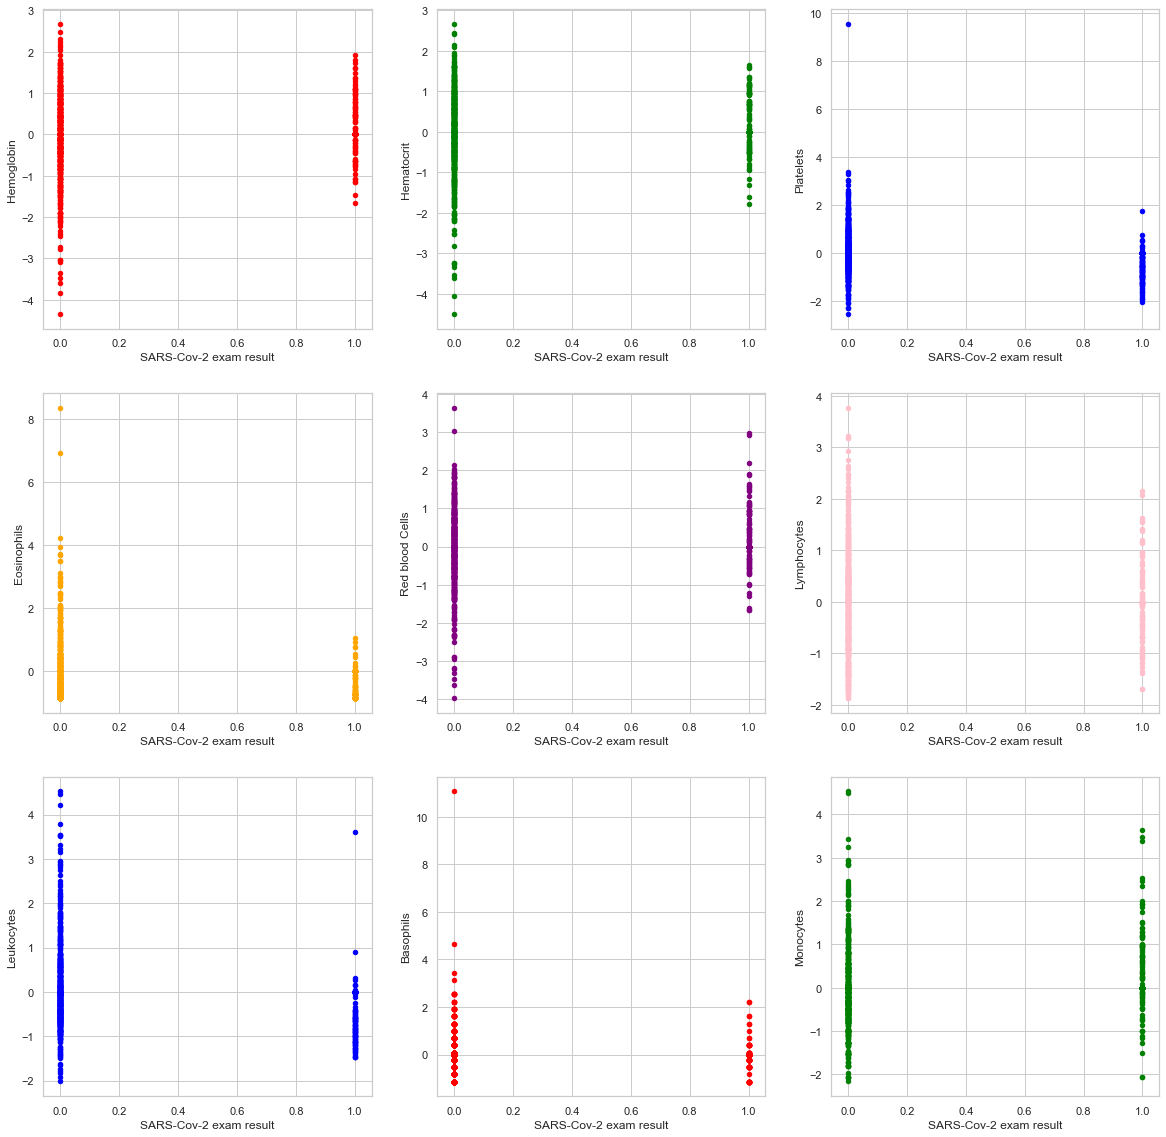

In [17]:
# visualize the relationship between the features and the target using scatterplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Hemoglobin',ax=axs[0,0], c='red')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Hematocrit', ax=axs[0,1], c='green')
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Platelets',ax=axs[0,2], c='blue')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Eosinophils', ax=axs[1,0], c='orange')
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Red blood Cells',ax=axs[1,1], c='purple')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Lymphocytes', ax=axs[1,2], c='pink')
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Leukocytes',ax=axs[2,0], c='blue')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Basophils', ax=axs[2,1], c='red')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Monocytes', ax=axs[2,2], c='green')

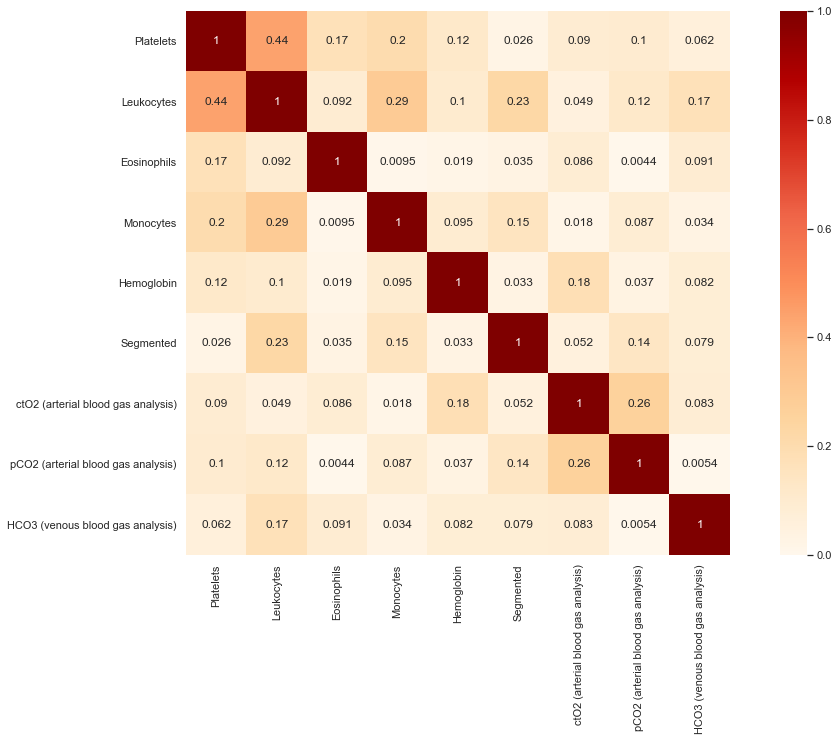

In [38]:
# visualize the relationship between the data points using heatmap
corr_matrix = abs(dataset.corr())

# correlation with target variable
corr_target = corr_matrix["SARS-Cov-2 exam result"]

# selecting highly correlated features
relevant_features = ["Platelets","Leukocytes","Eosinophils","Monocytes","Hemoglobin","Segmented","ctO2 (arterial blood gas analysis)","pCO2 (arterial blood gas analysis)","HCO3 (venous blood gas analysis)"]

# plotting the heatmap
fig, axs = plt.subplots(figsize=(18, 10))
sns.heatmap(abs(dataset[relevant_features].corr()), yticklabels=relevant_features, xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')

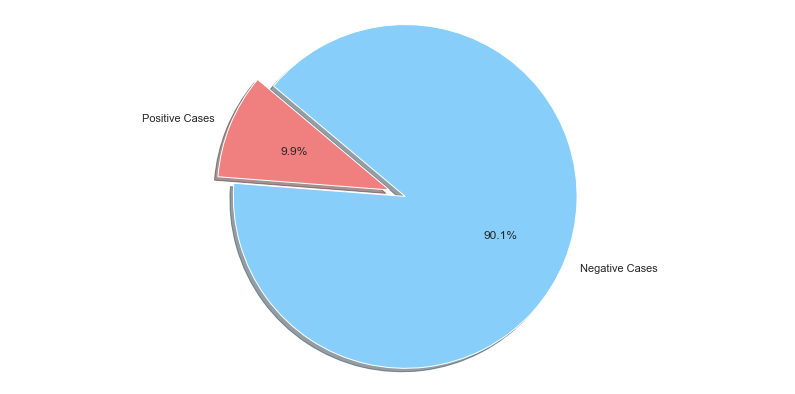

In [20]:
# visualize positive cases vs negative cases
dataset_negative = dataset['SARS-Cov-2 exam result'] == 0
dataset_positive = dataset['SARS-Cov-2 exam result'] == 1

# data to plot
labels = 'Positive Cases', 'Negative Cases'
sizes = [dataset_positive.sum(), dataset_negative.sum()]
colors = ['lightcoral', 'lightskyblue']
# explode 1st slice
explode = (0.1, 0) 

fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Implementing K-Nearest Neighbors Algorithm


**What is K-Nearest Neighbor Algorithm?**

As explained by Wikipedia:

> In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression: 
- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 
- In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation.

### Importing KNeighborsClassifier using Sklearn Library
Now we will use K-Nearest Neighbors Classification to predict a new record on the basis of this data. 

In [21]:
# import the KNeighborsClassifier module
from sklearn.neighbors import KNeighborsClassifier

### Instantiate the model
Now we will create a knn-model classifier for making predictions.

In [22]:
# instantiating KNeighborsClassifier
knn = KNeighborsClassifier()

## Splitting Training and Testing Data
In order to evaluate our model later for perfomance metrics or factors, we will split our data set into two groups.
- Training Data, consisting of 70 percent of data on which we will train our model
- Testing Data, consisting of remaing 30 percent of data on which we will perform evaluation

### Importing train_test_split using Sklearn Library
We will use train_test_split to split our data set into training and testing data.

In [23]:
# for splitting data into training and testing data
from sklearn.model_selection import train_test_split

### Assignment of X_train, X_test, y_train, y_test

In [24]:
# defining target variables 
target = dataset['SARS-Cov-2 exam result']

# defining predictor variables 
features = dataset.select_dtypes(exclude=[object])

# assigning the splitting of data into respective variables
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

### Exploring X_train, X_test, y_train, y_test


In [52]:
print("Number of samples in train set: %d" % y_train.shape)
print("Number of positive samples in train set: %d" % (y_train == 1).sum(axis=0))
print("Number of negative samples in train set: %d" % (y_train == 0).sum(axis=0))
print()
print("Number of samples in test set: %d" % y_test.shape)
print("Number of positive samples in test set: %d" % (y_test == 1).sum(axis=0))
print("Number of negative samples in test set: %d" % (y_test == 0).sum(axis=0))

Number of samples in train set: 3950
Number of positive samples in train set: 391
Number of negative samples in train set: 3559

Number of samples in test set: 1694
Number of positive samples in test set: 167
Number of negative samples in test set: 1527


In [26]:
# to display the HTML representation of an object.
from IPython.display import display_html

X_train_data = X_train.describe().style.set_table_attributes("style='display:inline'").set_caption('Summary of Training Data')
X_test_data = X_test.describe().style.set_table_attributes("style='display:inline'").set_caption('Summary of Testing Data')

# to display the summary of both training and testing data, side by side for comparison 
display_html(X_train_data._repr_html_(), raw = True)
display_html(X_test_data._repr_html_(), raw = True)

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000
mean,9.254177,0.098987,0.002785,0.003590,0.005637,-0.001059,0.004458,0.004717,0.003713,0.001598,0.001392,-0.002743,0.004889,-0.004696,-0.000297,-0.002991,-0.000331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003478,-0.000473,-0.000835,0.001118,0.002423,-0.002729,0.008608,0.009873,0.002143,0.001309,-0.000344,0.000011,-0.000839,0.000726,-0.000604,-0.001110,0.000055,0.001327,0.000442,0.000435,0.000345,0.000826,-0.000716,0.000782,-0.002391,0.000138,0.000775,-0.000459,-0.001664,0.000000,0.001454,-0.001094,0.000000,0.000000,0.000000,0.000000,0.001504,-0.000761,0.001863,-0.000690,0.000503,-0.001043,-0.000185,0.000799,0.000923,-0.001912,0.000819,0.001973,-0.000946,-0.000766,0.000278,-0.000334,-0.000605,-0.000272
std,5.775991,0.298683,0.320375,0.323831,0.335154,0.325955,0.317934,0.325595,0.334381,0.323793,0.290016,0.320451,0.340180,0.327365,0.314322,0.335370,0.189123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000
mean,9.468123,0.098583,-0.006495,-0.008371,-0.013144,0.002469,-0.010396,-0.011000,-0.008658,-0.003725,-0.003246,0.006396,-0.011400,0.010951,0.000692,0.006975,0.000771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008110,0.001103,0.001948,-0.002606,-0.005649,0.006364,0.008855,0.007674,-0.004997,-0.003052,0.000802,-0.000026,0.001956,-0.001693,0.001408,0.002589,-0.000129,-0.003094,-0.001030,-0.001013,-0.000805,-0.001926,0.001669,-0.001824,0.005575,-0.000323,-0.001807,0.001070,0.003881,0.000000,-0.003391,0.002551,0.000000,0.000000,0.000000,0.000000,-0.003508,0.001775,-0.004344,0.001610,-0.001174,0.002432,0.000431,-0.001863,-0.002151,0.004458,-0.001909,-0.004599,0.002205,0.001786,-0.000647,0.000779,0.001410,0.000634
std,5.781296,0.298190,0.341612,0.333866,0.305490,0.325538,0.345902,0.328832,0.307688,0.333187,0.399222,0.340584,0.292350,0.324710,0.352901,0.305228,0.198566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

## Hyperparameter Tuning - Adjust important parameters using Grid Search CV
Parameters that needs to be specified before fitting (training) a model are called Hyperparameters, like *n_neighbors* in our case. So, the process of choosing the optimal hyperparameters for the learning algorithm is called Hyperparameter Tuning.

We will be using the *Grid Search Cross Validation* technique to choose the hyperparameter (n_neighbors) that would perform the best, for our model.

**What is Grid Search Cross Validation technique?**

As explained by Wikipedia:

> The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.
Since the parameter space of a machine learner may include real-valued or unbounded value spaces for certain parameters, manually set bounds and discretization may be necessary before applying grid search.

### Importing GridSearchCV using Sklearn Library
Since, we are using the grid search cross validation technique for hyperparameter tuning, we will first import it from the Sklearn Library.

In [27]:
# for exhaustive search over specified parameter values for an estimator
from sklearn.model_selection import GridSearchCV

### Defining the Parameter Grid

In [28]:
# assigning the dictionary of variables whose optimium value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}

At this point, we have a classifier and paramerter_grid, so we can perform the Grid Search Cross Validation.

In [29]:
# performing Grid Search CV on knn-model, using 5-cross folds for validation of each criteria
knn_cv = GridSearchCV(knn, param_grid, cv=5)

### Training the Classifier
The idea is to tune the model's hyperparameter on the training set and then evaluate later it's performance on the hold-out set. So, using the training set that we have obtained before, that is, X_train and y_train, we will now fit the model.

In [30]:
# training the model with the training data and best parameter
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Best Parameter and Best Score
Let's look for the value of the required parameter, chosen to be the most efficient for the model. Along with the score that it achieved.

In [31]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 7}
The best score we have achieved is: 0.9956962025316456


The n_neighbor is set as **7** and the accuracy level is **99.5696%**

## Testing the Model
Apply the model. For supervised algorithms, this is predict.

In [32]:
# predicting the values using the testing data set
y_pred = knn_cv.predict(X_test)

## Model Performance

In classification problems, *accuracy* is the commonly used metric to evaluate the performance of the model, which means the fraction of the correct predictions.

In [44]:
# the score() method allows us to calculate the mean accuracy for the test data
print("The score accuracy for training data is: {}" .format(knn_cv.score(X_train,y_train)))
print("The score accuracy for testing data is: {}" .format(knn_cv.score(X_test,y_test)))

The score accuracy for training data is: 0.9959493670886076
The score accuracy for testing data is: 0.9970484061393152


This metric quantifies the fraction of the correct predictions. Thus, the accuracy of the model for training is **99.59%** and to predict the values is **99.70%**.

### Importing classification_report and confusion_matrix using Sklearn Library
We will use classification_report and confusion_matrix to view the performance factors of our model.

In [45]:
# for performance metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [35]:
# call the classification_report and print the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1527
           1       1.00      0.97      0.98       167

    accuracy                           1.00      1694
   macro avg       1.00      0.99      0.99      1694
weighted avg       1.00      1.00      1.00      1694



In [48]:
# call the confusion_matrix and print the matrix
print(confusion_matrix(y_test, y_pred))

[[1527    0]
 [   5  162]]


Although the array is printed without headings, but you can see that the majority of the predictions fall on the diagonal line of the matrix (which are correct predictions).

Finally, we have trained our model and it's successfully predicting correct values with maximum accuracy. 

## Summary

In this notebook, first, we examined the data to understand it and extracted information required to know the *features* and *target*. Then, data cleaning is performed to transform the data in the right and useful format. After that, we have visualized the data to explore the relationship between the data points. We have splitted our data into testing and training data sets, as well. Later, we have intantiated the KNeighbors classifier and performed hyperparameter tuning to figure out the best and optimum parameter for training our model. Subsequently, we have evaluated our model predictions using different performance metrics and achieved maximum accuracy.